<IPython.core.display.Javascript object>


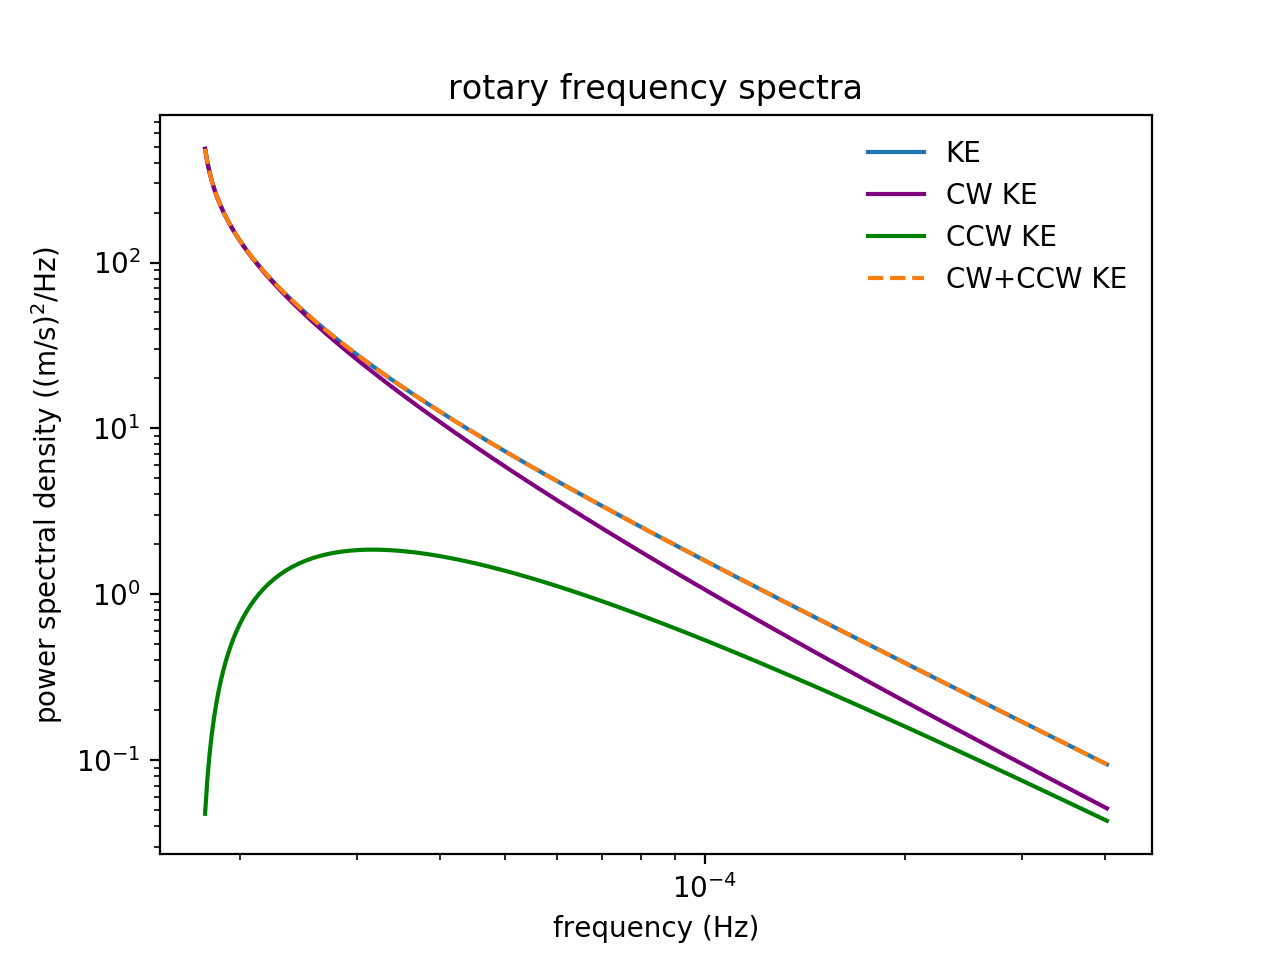

In [2]:
# This code is for the GM spectra near Barkley Canyon, off the coast of Vancouver Island, British Columbia, Canada.
# Adapted from the following:

# ----------------------------------------------------------------------------
# Copyright (C) 2016 Joern Callies
#
# This file is part of GM81.
#
# GM81 is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# GM81 is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with GM81. If not, see <http://www.gnu.org/licenses/>.
#
# This computes KE and PE frequency spectra as well as 1D horizontal wavenumber spectra.
# ----------------------------------------------------------------------------


import numpy as np
import matplotlib.pyplot as plt
import gm
%matplotlib notebook

# Coriolis frequency
f = 1.09e-4            # rad/s, lat 48.39 deg N, inertial period of 16.05 hours (1.73e-5 Hz)

# buoyancy frequency (averaged between -890m and -900m)
N = 2.53e-3            # rad/s, from lower depth avg N^2 of 6.32e-6 (rad/s)^2, averaged years and seasons 2013-2018

# surface-extrapolated buoyancy frequency
N0 = 5.24e-3           # as given in GM79 literature

# e-folding scale of N(z)
b = 1.3e3              # m, according to GM79 literature, p.285, this is fairly universal
#https://ocw.mit.edu/resources/res-12-000-evolution-of-physical-oceanography-spring-2007/part-2/wunsch_chapter9.pdf

# frequency
omg = np.logspace(np.log10(1.02*f), np.log10(N), 401)      

# horizontal wavenumber
k = 2*np.pi*np.logspace(-6, -2, 401)                       

# mode number
j = np.arange(1, 100)

# reshape to allow multiplication into 2D array
Omg = np.reshape(omg, (omg.size,1))
K = np.reshape(k, (k.size,1))
J = np.reshape(j, (1,j.size))

# frequency spectra (KE and PE)
K_omg_j = gm.K_omg_j(Omg, J, f, N, N0, b)
P_omg_j = gm.P_omg_j(Omg, J, f, N, N0, b)

# wavenumber spectra (KE and PE)
K_k_j = gm.K_k_j(K, J, f, N, N0, b)
P_k_j = gm.P_k_j(K, J, f, N, N0, b)

# sum over modes
K_omg = np.sum(K_omg_j, axis=1)
P_omg = np.sum(P_omg_j, axis=1)
K_k = np.sum(K_k_j, axis=1)
P_k = np.sum(P_k_j, axis=1)

# compute 1D spectra from 2D spectra
K_k_1d = gm.calc_1d(k, K_k)
P_k_1d = gm.calc_1d(k, P_k)

# compute GM rotary spectra, adapted from Levine 2002 vs Polzin & Lvov 2011
cw_E = (omg + f)**2                  # cw velocity energy per frequency (Polzin & Lvov 2011, p.4, eq.10), (rad/s)
ccw_E = (omg - f)**2                 # ccw velocity energy per frequency, (rad/s)
total_E = cw_E + ccw_E               # total variance (rad/s)
cw_K = (cw_E / total_E) * K_omg      # proportion of cw velocity energy * KE spectrum, rad/s
ccw_K = (ccw_E / total_E) * K_omg    # proportion of ccw velocity energy * KE spectrum, rad/s

# save GM kinetic energy frequency spectra
data = np.column_stack((omg, K_omg, cw_K, ccw_K))
header = "freq, energy, cw_energy, ccw_energy"
np.savetxt('gm.dat', data, header=header)

# plot frequency spectra
# fig, ax = plt.subplots()
# ax.loglog(omg/(2*np.pi), 2*np.pi*P_omg, label='PE', c='orange')
# ax.loglog(omg/(2*np.pi), 2*np.pi*K_omg, label='KE')
# ax.legend(frameon=False)
# ax.set_title('frequency spectra')
# ax.set_xlabel('frequency (Hz)')
# ax.set_ylabel('power spectral density ((m/s)$^2$/Hz)')

# plot rotary KE frequency spectra
fig, ax = plt.subplots()
ax.loglog(omg/(2*np.pi), K_omg*(2*np.pi), label='KE')
ax.loglog(omg/(2*np.pi), cw_K*(2*np.pi), label='CW KE', c='purple')
ax.loglog(omg/(2*np.pi), ccw_K*(2*np.pi), label='CCW KE', c='green')
ax.loglog(omg/(2*np.pi), (cw_K+ccw_K)*(2*np.pi), label='CW+CCW KE', ls='--')
ax.legend(frameon=False)
ax.set_title('rotary frequency spectra')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('power spectral density ((m/s)$^2$/Hz)')

# plot wavenumber spectra
# fig, ax = plt.subplots()
# ax.loglog(k/(2*np.pi), 2*np.pi*P_k_1d, label='PE', c='orange')
# ax.loglog(k/(2*np.pi), 2*np.pi*K_k_1d, label='KE')
# ax.legend(frameon=False)
# ax.set_title('wavenumber spectra')
# ax.set_xlabel('wavenumber (cpm)')
# ax.set_ylabel('power spectral density ((m/s)$^2$/cpm)')

plt.show()